# ifm_contrib: Plot - Pandas Extension

GeoPANDAS is a Python library with powerfull features for 2D Geometry operations.
The `doc.c.plot.gdf` object provides features to export plots similar to those in FEFLOW's View Components Panel to GeoPandas GeoDataFrames.

*contact: [Alex Renz](https://github.com/red5alex), are@dhigroup.com* 

In [1]:
import ifm_contrib as ifm 
from ifm import Enum
ifm.forceLicense("Viewer")

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
doc = ifm.loadDocument("./../../unittests/models/example_2D.dac")

`doc.c.plot.gdf.fringes()` and `doc.c.plot.gdf.isolines()` returns a GeoDataFrame with contents similar to a shp-file exported from FEFLOWs View Components Panel.

In [3]:
# get isocontourlines of head as geodataframe 
gdf_isolines = doc.c.plot.gdf.isolines(par=Enum.P_HEAD)
gdf_isolines

,geometry,400
0,LINESTRING (187.3262833584875 1026.33679623645...,1.5
1,LINESTRING (-39.37918520425492 766.04528182192...,1.5
2,LINESTRING (225.1981604734997 1021.39698617797...,3.0
3,"LINESTRING (33.04313369534197 777.61886116346,...",3.0
4,LINESTRING (488.8317293145284 768.762820379029...,3.0
5,LINESTRING (723.5758921499383 946.962914269703...,4.5
6,LINESTRING (875.3004342862234 837.349884960150...,6.0
7,LINESTRING (263.9419992098279 569.776232663093...,6.0
8,LINESTRING (927.0531582498502 752.754086173452...,7.5
9,LINESTRING (962.1545833037386 695.376756758442...,9.0


In [4]:
# get fringes polygons 
gdf_fringes = doc.c.plot.gdf.fringes(Enum.P_HEAD)
gdf_fringes

,geometry,layer,400_min,400_max
0,(POLYGON ((-102.0681170055721 384.373288513293...,0.75,0.0,1.5
1,(POLYGON ((-46.06188966457328 356.370174842794...,2.25,1.5,3.0
2,(POLYGON ((40.73461347650401 312.9719232722558...,3.75,3.0,4.5
3,(POLYGON ((553.5701232835737 249.7483858295616...,5.25,4.5,6.0
4,(POLYGON ((693.4648340119461 258.0180239021747...,6.75,6.0,7.5
5,(POLYGON ((784.8333987668673 263.4191213261109...,8.25,7.5,9.0
6,(POLYGON ((962.1545833037386 695.3767567584428...,9.75,9.0,10.5


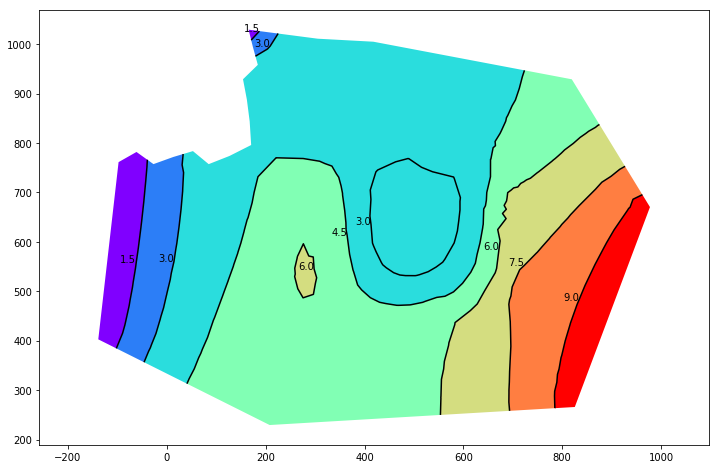

In [5]:
# create new maplotlib figure
fig, ax = plt.subplots(1,1, figsize=(12,8))
plt.axis("equal")

# add fringes, isolines and isoline labels
gdf_fringes.plot("400_min", ax=ax, cmap="rainbow")
gdf_isolines.plot(ax=ax, colors="black")
_ = gdf_isolines.apply(lambda x: ax.annotate(s=x[str(Enum.P_HEAD)], 
                                         xy=x.geometry.representative_point().coords[0], 
                                         ha='right', 
                                         color="black"),
                   axis=1)